In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("C:/Users/admin/Desktop/JuliaDQMC/code/")
from DP_Lib import *
from Plt_Lib import *

In [2]:
# 主程序
folder_paths = "./"
U,Data=File_Process(folder_paths,throw=0)
t=Data['t'].values.astype(float)
L=Data["L"].values.astype(int)
EE=Data["EE"].values.astype(float)
dEE=Data["dEE"].values.astype(float)

Lu=np.unique(L)
skip=4


SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ0.3N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ0.6N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ0.9N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ1.2N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ1.5N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ1.8N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ2.1N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ2.4N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ2.7N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ3.0N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ3.3N15BS10.csv
SCEEicrHC120_t1.0U7.0size[12, 12]Δt0.03Θ3.6N15BS10.csv
SCEEicrHC120_t1.0U7.0size[15, 15]Δt0.03Θ0.3N21BS10.csv
SCEEicrHC120_t1.0U7.0size[15, 15]Δt0.03Θ0.6N21BS10.csv
SCEEicrHC120_t1.0U7.0size[15, 15]Δt0.03Θ0.9N21BS10.csv
SCEEicrHC120_t1.0U7.0size[15, 15]Δt0.03Θ1.2N21BS10.csv
SCEEicrHC120_t1.0U7.0size[15, 15]Δt0.03Θ1.5N21BS10.csv
SCEEicrHC120_t1.0U7.0size[15, 15]Δt0.03Θ1.8N21BS10.csv
SCEEicrHC1

$ y= ( 0.071\pm 0.012 ) \ln \tau + -0.027$


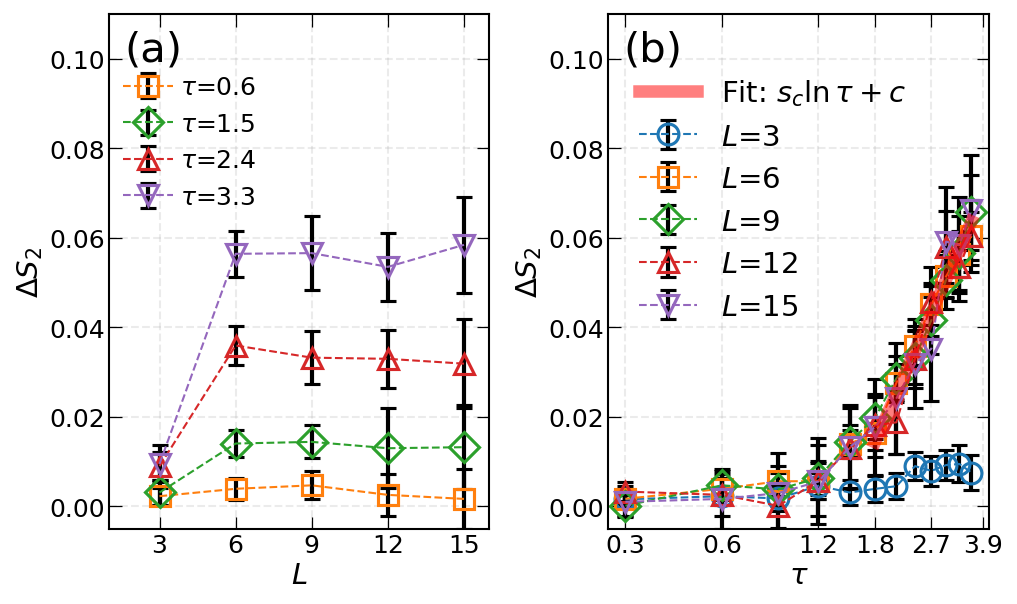

In [7]:
t=Data['t'].values.astype(float)
L=Data["L"].values.astype(int)
EE=Data["EE"].values.astype(float)
dEE=Data["dEE"].values.astype(float)
tlist=np.unique(t)
Lu=np.unique(L)
skip=5

fig,ax=create_plot(1,2,col=1)
Avg=[]
dAvg=[]
# figTheta=plt.figure(figsize=(8,6))
count=0
for i, Θ in enumerate(tlist):
    idx = Data['t'] == Θ
    x = Data.loc[idx, 'L'].values
    y = Data.loc[idx, 'EE'].values
    dy = Data.loc[idx, 'dEE'].values

    # 找到最近邻数据点
    sorted_indices = np.argsort(x)
    x = x[sorted_indices]
    y = y[sorted_indices]
    dy = dy[sorted_indices]

    data=[(x[i],y[i],dy[i]) for i in range(len(x))]

    idx=unit_neardata(data)
    avg = np.mean(y[idx])
    Avg.append(avg)
    dAvg.append(np.mean(dy[idx]))


    if i%3==1:
        count+=1
        plot_data(ax[0], x, y, yerr=dy, marker=markers[count%len(markers)], color=colors[count%len(colors)], label=rf'$\tau$={Θ}')
    # ax[0].errorbar(x, y, yerr=dy,
    #     capsize=errorbar_capsize, ecolor='black', markerfacecolor='none',
    #     marker=markers[i%len(markers)], color=colors[i%len(colors)], fmt='-', label=f'$\Theta$={Θ}')

    # plt.axhline(avg, color="black", linestyle='--',linewidth=0.2)
    # plt.text(2, avg, f'{avg:.2f}', ha='center', va='bottom')

    # for i in idx:
    #     plt.text(x[i], y[i], "[  ]", color='blue',ha='center',va='center',fontsize=10)

ax[0].legend(bbox_to_anchor=(0.01, 0.9), loc='upper left',handletextpad=0.3, borderaxespad=0.,fontsize=6)
# plt.legend(loc='right')
ax[0].set_xlabel(r'$L$')
ax[0].set_ylabel(r'$\Delta S_2$')
ax[0].set_xticks([3,6,9,12,15,18])
ax[0].set_xlim(1,max(L)+1)


ax[1].set_xscale("log")
ax[1].set_xlabel("")

# 遍历处理每个L值
for l in Lu:
    # 获取当前L值的索引
    idx = np.where(np.array(L) == l)[0]

    if len(idx) > 0:
        # 提取数据并排序
        x = (t[idx])  # 原代码对t取对数
        y = EE[idx]
        dy = dEE[idx]
        
        sorted_indices = np.argsort(x)
        x_sorted = x[sorted_indices]
        y_sorted = y[sorted_indices]
        dy_sorted = dy[sorted_indices]
        
        i=np.where(Lu==l)[0][0]
        plot_data(ax[1], x_sorted, y_sorted, yerr=dy_sorted, marker=markers[i%len(markers)], color=colors[i%len(colors)], label=f'$L$={l}')
        # ax[1].errorbar(x_sorted, y_sorted, yerr=dy_sorted,
            # capsize=errorbar_capsize, markersize=10,ecolor='black', markerfacecolor='none',
            # marker=markers[i%len(markers)], color=colors[i%len(colors)], fmt='--', label=f"L={int(l)}")
Avg=np.array(Avg)
dAvg=np.array(dAvg)
para,ds=linear_fit(np.log(tlist[skip:]),Avg[skip:],dAvg[skip:])
x=np.linspace(tlist[skip],tlist[-1],100)
y=para[0]*np.log(x)+para[1]
ax[1].plot(x, y,linewidth=3,alpha=0.5,color='red',zorder=10 , label=rf'Fit: $s_c\ln \tau +c$')
print(f'$ y= ( {para[0]:.3f}\pm {ds:.3f} ) \ln \\tau + {para[1]:.3f}$')
s=para[0]
const=para[1]
# 调整图例位置（右上角）
ax[1].legend(bbox_to_anchor=(0.05, 0.9), loc='upper left', borderaxespad=0.)
# 绘制基准线
ax[1].set_xticks([0.3,0.6,1.2,1.8,2.7,3.9])
ax[1].set_xticklabels([ '0.3', '0.6', '1.2', '1.8', '2.7', '3.9'])
ax[1].set_xlabel(r"$ \tau$ ")
ax[1].minorticks_off()
ax[1].set_ylabel(r"$\Delta S_2$")


ax[0].set_ylim(-0.005,0.11)
ax[1].set_ylim(-0.005,0.11)

ABCD=["a","b","c","d","e","f","g"]
for idx, subax in enumerate(ax.ravel()):
    subax.grid(True, which='both',linestyle='--', linewidth=0.5, alpha=0.25)
    subax.minorticks_off()
    subax.text(0.04, 0.97, f'({ABCD[idx]})', transform=subax.transAxes, fontsize=10, va='top')
# fig.subplots_adjust(bottom=0.08)
fig.savefig("fixThetaU7.pdf", bbox_inches='tight', pad_inches=0.02)


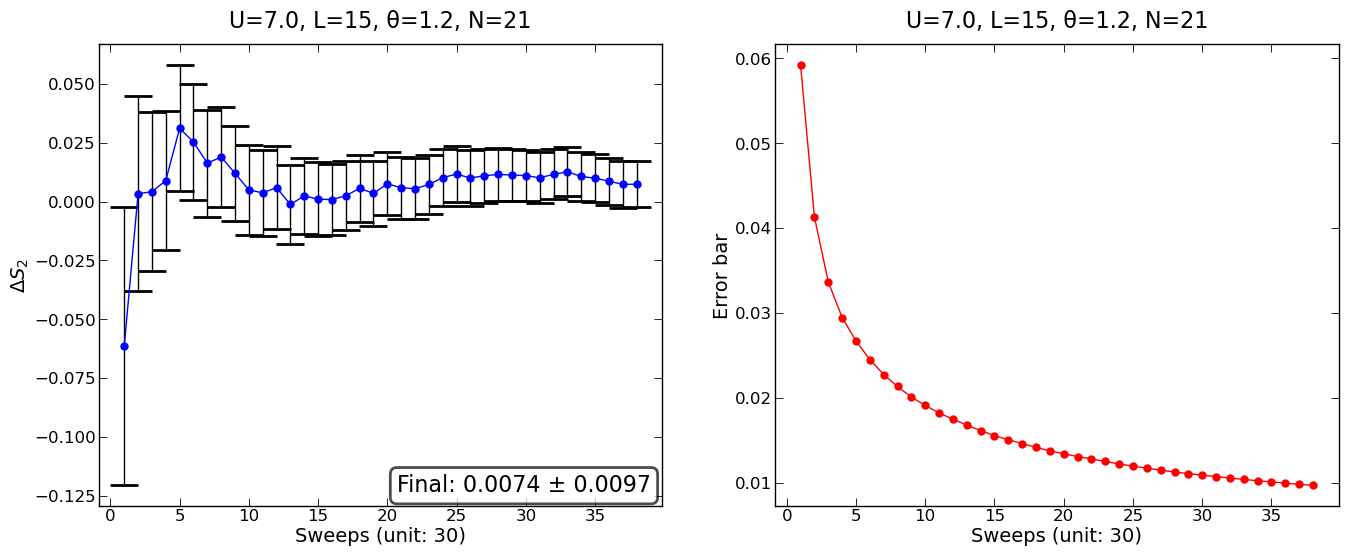

In [9]:
import glob
L=15
Theta=1.2
file=glob.glob(f"./{L}/*size*Θ{Theta}*.csv")[0]

fig=sweep_stable(30,file)